# Random Forest Regressor


# Dataset - 3

In [ ]:
import numpy as np
import pandas as pd
from bokeh.plotting import figure, show
from bokeh.io import output_notebook
from bokeh.models import DatetimeTickFormatter
from bokeh.layouts import row, column

In [ ]:
df = pd.read_excel('/content/3-hour-load-weather-data.xlsx')
df

,DATE,max-temp,min-temp,RH-0830,RH-1730,MW
0,2017-01-01 00:00:00,20.3,9.2,100,80,1815.571045
1,2017-01-01 01:00:00,20.3,9.2,100,80,1576.699585
2,2017-01-01 02:00:00,20.3,9.2,100,80,1428.967896
3,2017-01-01 03:00:00,20.3,9.2,100,80,1356.272705
4,2017-01-01 04:00:00,20.3,9.2,100,80,1354.029175
...,...,...,...,...,...,...
26275,2019-12-31 19:00:00,9.4,4.8,91,69,4157.812988
26276,2019-12-31 20:00:00,9.4,4.8,91,69,4008.450439
26277,2019-12-31 21:00:00,9.4,4.8,91,69,3757.650391
26278,2019-12-31 22:00:00,9.4,4.8,91,69,3556.840576


## Finding the correlation between the features

In [ ]:
df.corr(method='pearson')

,max-temp,min-temp,RH-0830,RH-1730,MW
max-temp,1.000000,0.882116,-0.628697,-0.371664,0.666025
min-temp,0.882116,1.000000,-0.464201,-0.127366,0.768115
RH-0830,-0.628697,-0.464201,1.000000,0.538387,-0.338540
RH-1730,-0.371664,-0.127366,0.538387,1.000000,-0.054682
MW,0.666025,0.768115,-0.338540,-0.054682,1.000000


In [ ]:
# x = df[['max-temp',	'min-temp',	'RH-0830',	'RH-1730', 'day']]
# y = df['MW']

## Split Data into Training and Testing

In [ ]:
# MANUAL SPLIT

train = df.loc[ df['DATE'].dt.year < 2019 ]
test = df.loc[ df['DATE'].dt.year >= 2019 ]

x_train = train[['max-temp',	'min-temp',	'RH-0830',	'RH-1730']]
y_train = train['MW']

x_test = test[['max-temp',	'min-temp',	'RH-0830',	'RH-1730']]
y_test = test['MW']


## Creating the model using Random Forest Regressor

In [ ]:
#Importing Random Forest Regressor from ensemble library
from sklearn.ensemble import RandomForestRegressor

In [ ]:
#Initialize the model
model = RandomForestRegressor()

In [ ]:
#Fitting our train data on the model
model.fit(x_train, y_train)

RandomForestRegressor()

In [ ]:
r2_score = model.score(x_test,y_test)
print(r2_score*100,'%')

68.02295076444705 %


## Now we move on the the Prediction Analysis!

In [ ]:
predictions = model.predict(x_test)

In [ ]:
predictions

array([2819.75550363, 2819.75550363, 2819.75550363, ..., 2859.77785657,
       2859.77785657, 2859.77785657])

(array([  18.,  600.,  997., 1332., 1827., 2215., 1253.,  437.,   70.,
          11.]),
 array([-1775.84088894, -1353.64494014,  -931.44899134,  -509.25304255,
          -87.05709375,   335.13885505,   757.33480384,  1179.53075264,
         1601.72670144,  2023.92265023,  2446.11859903]),
 <a list of 10 Patch objects>)

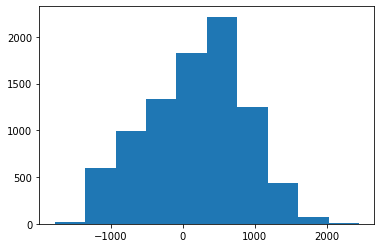

In [ ]:
import matplotlib.pyplot as plt
plt.hist(y_test - predictions)

In [ ]:
len(y_test)

8760

In [ ]:
# pred and test

x = test['DATE']
y1 = y_test
y2 = predictions

p = figure(title="Date vs MW", 
           sizing_mode="stretch_width",
           x_axis_type='datetime',
           x_axis_label='Date',
           y_axis_label='MW')

p.line(x, y1, legend_label="Test", line_width=1)
p.line(x, y2, legend_label="Predicted", line_width=1, color='red')
p.xaxis[0].formatter = DatetimeTickFormatter(months="%b %Y")

output_notebook()
show(p)

## SCORE

In [ ]:
from sklearn.metrics import explained_variance_score
explained_variance_score(y_test, predictions)

0.701537495215339

In [ ]:
from sklearn.metrics import r2_score 
r2_score(y_test, predictions)

0.6802295076444704

## Evaluating our Regression Model using Metrics

### 1. Mean Absolute Error

$$\frac 1n\sum_{i=1}^n|y_i-\hat{y}_i|$$


### 2. Mean Squared Error

$$\frac 1n\sum_{i=1}^n(y_i-\hat{y}_i)^2$$


### 3. Root Mean Squared Error

$$\sqrt{\frac 1n\sum_{i=1}^n(y_i-\hat{y}_i)^2}$$


## All these are basically "Loss Functions".
### A loss function is a measure of how good a prediction model does in terms of being able to predict the expected outcome. Basically, we want to reduce the value of Loss functions


In [ ]:
from sklearn import metrics

In [ ]:
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 587.4705134527485
MSE: 490667.3446270331
RMSE: 700.4765125448769


# Dataset - 4

In [ ]:
import numpy as np
import pandas as pd
from bokeh.plotting import figure, show
from bokeh.io import output_notebook
from bokeh.models import DatetimeTickFormatter
from bokeh.layouts import row, column

In [ ]:
df = pd.read_excel('/content/4-day-load-weather-data.xlsx', parse_dates=True)
df

,date,max-temp,min-temp,RH-0830,RH-1730,MW
0,2017-01-01,20.3,9.2,100,80,3536.238770
1,2017-01-02,23.2,9.3,100,82,3639.738770
2,2017-01-03,24.3,9.5,100,77,3673.321289
3,2017-01-04,24.0,8.9,97,66,3898.860840
4,2017-01-05,25.2,10.4,97,71,3547.965820
...,...,...,...,...,...,...
1090,2019-12-27,13.4,4.2,86,76,4976.180664
1091,2019-12-28,14.4,2.4,100,83,4708.879395
1092,2019-12-29,13.3,3.1,94,79,4831.750488
1093,2019-12-30,15.8,2.6,100,97,5298.331055


## Finding the correlation between the features

In [ ]:
df.corr(method='pearson')

,max-temp,min-temp,RH-0830,RH-1730,MW
max-temp,1.000000,0.882116,-0.628697,-0.371664,0.643710
min-temp,0.882116,1.000000,-0.464201,-0.127366,0.776070
RH-0830,-0.628697,-0.464201,1.000000,0.538387,-0.327478
RH-1730,-0.371664,-0.127366,0.538387,1.000000,-0.016560
MW,0.643710,0.776070,-0.327478,-0.016560,1.000000


In [ ]:
# x = df['day']
# y = df['MW']

## Split Data into Training and Testing

In [ ]:
# MANUAL SPLIT

train = df.loc[ df['date'].dt.year < 2019 ]
test = df.loc[ df['date'].dt.year >= 2019 ]

x_train = train[['max-temp',	'min-temp',	'RH-0830',	'RH-1730']]
y_train = train['MW']

x_test = test[['max-temp',	'min-temp',	'RH-0830',	'RH-1730']]
y_test = test['MW']

In [ ]:
# train_test_split => GIVING BETTER RESULTS

# from sklearn.model_selection import train_test_split
# x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3)


## Creating the model using Random Forest Regressor

In [ ]:
#Importing Random Forest Regressor from ensemble library
from sklearn.ensemble import RandomForestRegressor

In [ ]:
#Initialize the model
model = RandomForestRegressor()

In [ ]:
#Fitting our train data on the model
model.fit(x_train, y_train)

RandomForestRegressor()

In [ ]:
r2_score = model.score(x_test,y_test)
print(r2_score*100,'%')

83.86137493465704 %


## Now we move on the the Prediction Analysis!

In [ ]:
predictions = model.predict(x_test)

In [ ]:
predictions

array([4102.93285156, 4057.59645996, 3924.12627686, 4077.53473633,
       3862.27461914, 3794.05016357, 4049.85101074, 3982.05974365,
       3850.13114258, 4020.34438477, 4012.12809326, 3923.95572998,
       3795.70464111, 3936.52060791, 4021.00503418, 4000.69234863,
       4032.18726807, 3989.14669922, 4150.51268555, 3951.98689697,
       3436.3269165 , 3650.90926514, 3984.11179687, 3784.58298584,
       3761.49331299, 3969.10297852, 3983.32425537, 3984.1689502 ,
       4180.84952637, 3992.34617676, 4019.07513672, 3673.78890625,
       3888.29431885, 3869.64257324, 3944.31570557, 3789.52317383,
       3640.67974365, 3397.82118408, 4067.28181152, 3937.7608374 ,
       4003.63873047, 4040.74584473, 3745.89786621, 3707.07260986,
       3550.96381836, 3653.88766846, 3657.80428223, 3751.4349292 ,
       3750.58701904, 3513.6287793 , 3534.59909912, 3754.35640625,
       3518.4300708 , 3757.23711182, 3765.11987305, 3820.4188501 ,
       3715.07009033, 3840.67403809, 4142.75953125, 4041.03700

(array([  2.,   2.,   3.,  26.,  76., 118.,  78.,  44.,  13.,   3.]),
 array([-1320.1863623 , -1044.59143286,  -768.99650342,  -493.40157397,
         -217.80664453,    57.78828491,   333.38321436,   608.9781438 ,
          884.57307324,  1160.16800269,  1435.76293213]),
 <a list of 10 Patch objects>)

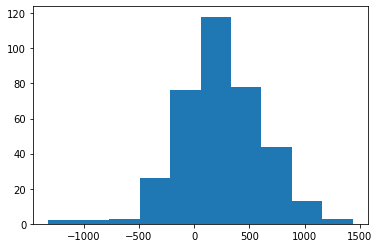

In [ ]:
import matplotlib.pyplot as plt
plt.hist(y_test - predictions)

In [ ]:
len(y_test)

365

In [ ]:
# pred and test

x = test['date']
y1 = y_test
y2 = predictions

p = figure(title="Date vs MW", 
           sizing_mode="stretch_width",
           x_axis_type='datetime',
           x_axis_label='Date',
           y_axis_label='MW')

p.line(x, y1, legend_label="Test", line_width=1)
p.line(x, y2, legend_label="Predicted", line_width=1, color='red')
p.xaxis[0].formatter = DatetimeTickFormatter(months="%b %Y")

output_notebook()
show(p)

## Evaluating our Regression Model using Metrics

### 1. Mean Absolute Error

$$\frac 1n\sum_{i=1}^n|y_i-\hat{y}_i|$$


### 2. Mean Squared Error

$$\frac 1n\sum_{i=1}^n(y_i-\hat{y}_i)^2$$


### 3. Root Mean Squared Error

$$\sqrt{\frac 1n\sum_{i=1}^n(y_i-\hat{y}_i)^2}$$


## All these are basically "Loss Functions".
### A loss function is a measure of how good a prediction model does in terms of being able to predict the expected outcome. Basically, we want to reduce the value of Loss functions


In [ ]:
from sklearn import metrics

In [ ]:
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 343.1264879267444
MSE: 192307.72150955524
RMSE: 438.5290429487598


# Dataset - 5

In [ ]:
import numpy as np
import pandas as pd
from bokeh.plotting import figure, show
from bokeh.io import output_notebook
from bokeh.models import DatetimeTickFormatter
from bokeh.layouts import row, column

In [ ]:
df = pd.read_excel('/content/5-hour-load-holiday-data.xlsx', parse_dates=True)
df

,DATE,day,MW
0,2017-01-01 00:00:00,2,1815.571045
1,2017-01-01 01:00:00,2,1576.699585
2,2017-01-01 02:00:00,2,1428.967896
3,2017-01-01 03:00:00,2,1356.272705
4,2017-01-01 04:00:00,2,1354.029175
...,...,...,...
26275,2019-12-31 19:00:00,0,4157.812988
26276,2019-12-31 20:00:00,0,4008.450439
26277,2019-12-31 21:00:00,0,3757.650391
26278,2019-12-31 22:00:00,0,3556.840576


## Finding the correlation between the features

In [ ]:
df.corr(method='pearson')

,day,MW
day,1.000000,-0.127804
MW,-0.127804,1.000000


In [ ]:
# x = df[['day']]
# y = df['MW']

## Split Data into Training and Testing

In [ ]:
# MANUAL SPLIT

train = df.loc[ df['DATE'].dt.year < 2019 ]
test = df.loc[ df['DATE'].dt.year >= 2019 ]

x_train = train[['day']]
y_train = train['MW']

x_test = test[['day']]
y_test = test['MW']

In [ ]:
# train_test_split => GIVING BETTER RESULTS

# from sklearn.model_selection import train_test_split
# x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3)


## Creating the model using Random Forest Regressor

In [ ]:
#Importing Random Forest Regressor from ensemble library
from sklearn.ensemble import RandomForestRegressor

In [ ]:
#Initialize the model
model = RandomForestRegressor()

In [ ]:
#Fitting our train data on the model
model.fit(x_train, y_train)

RandomForestRegressor()

In [ ]:
r2_score = model.score(x_test,y_test)
print(r2_score*100,'%')

-0.12193135028106816 %


## Now we move on the the Prediction Analysis!

In [ ]:
predictions = model.predict(x_test)

In [ ]:
predictions

array([3303.11432967, 3303.11432967, 3303.11432967, ..., 3745.2337245 ,
       3745.2337245 , 3745.2337245 ])

(array([ 657.,  613., 1216., 1715., 1387., 1273.,  976.,  618.,  265.,
          40.]),
 array([-2392.47493544, -1795.85557408, -1199.23621272,  -602.61685136,
           -5.99749   ,   590.62187135,  1187.24123271,  1783.86059407,
         2380.47995543,  2977.09931678,  3573.71867814]),
 <a list of 10 Patch objects>)

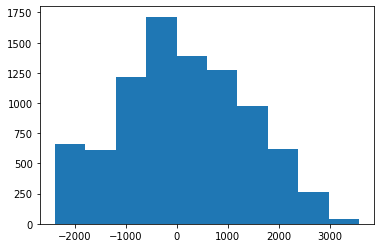

In [ ]:
import matplotlib.pyplot as plt
plt.hist(y_test - predictions)

In [ ]:
len(y_test)

8760

In [ ]:
# pred and test

x = test['DATE']
y1 = y_test
y2 = predictions

p = figure(title="Date vs MW", 
           sizing_mode="stretch_width",
           x_axis_type='datetime',
           x_axis_label='Date',
           y_axis_label='MW')

p.line(x, y1, legend_label="Test", line_width=1)
p.line(x, y2, legend_label="Predicted", line_width=1, color='red')
p.xaxis[0].formatter = DatetimeTickFormatter(months="%b %Y")

output_notebook()
show(p)

## SCORE

In [ ]:
from sklearn.metrics import explained_variance_score
explained_variance_score(y_test, predictions)

0.011342326520744406

In [ ]:
from sklearn.metrics import r2_score 
r2_score(y_test, predictions)

-0.0012193135028106816

## Evaluating our Regression Model using Metrics

### 1. Mean Absolute Error

$$\frac 1n\sum_{i=1}^n|y_i-\hat{y}_i|$$


### 2. Mean Squared Error

$$\frac 1n\sum_{i=1}^n(y_i-\hat{y}_i)^2$$


### 3. Root Mean Squared Error

$$\sqrt{\frac 1n\sum_{i=1}^n(y_i-\hat{y}_i)^2}$$


## All these are basically "Loss Functions".
### A loss function is a measure of how good a prediction model does in terms of being able to predict the expected outcome. Basically, we want to reduce the value of Loss functions


In [ ]:
from sklearn import metrics

In [ ]:
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 1014.8815782060494
MSE: 1536306.9254042446
RMSE: 1239.4784892866212


# Dataset - 6

In [ ]:
import numpy as np
import pandas as pd
from bokeh.plotting import figure, show
from bokeh.io import output_notebook
from bokeh.models import DatetimeTickFormatter
from bokeh.layouts import row, column

In [ ]:
df = pd.read_excel('/content/6-day-load-holiday-data.xlsx', parse_dates=True)
df

,date,day,MW
0,2017-01-01,2,3536.238770
1,2017-01-02,0,3639.738770
2,2017-01-03,0,3673.321289
3,2017-01-04,0,3898.860840
4,2017-01-05,2,3547.965820
...,...,...,...
1090,2019-12-27,0,4976.180664
1091,2019-12-28,1,4708.879395
1092,2019-12-29,1,4831.750488
1093,2019-12-30,0,5298.331055


## Finding the correlation between the features

In [ ]:
df.corr(method='pearson')

,day,MW
day,1.000000,-0.150346
MW,-0.150346,1.000000


In [ ]:
# x = df['day']
# y = df['MW']

## Split Data into Training and Testing

In [ ]:
# MANUAL SPLIT

train = df.loc[ df['date'].dt.year < 2019 ]
test = df.loc[ df['date'].dt.year >= 2019 ]

x_train = train[['day']]
y_train = train['MW']

x_test = test[['day']]
y_test = test['MW']

In [ ]:
# train_test_split => GIVING BETTER RESULTS

# from sklearn.model_selection import train_test_split
# x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3)


## Creating the model using Random Forest Regressor

In [ ]:
#Importing Random Forest Regressor from ensemble library
from sklearn.ensemble import RandomForestRegressor

In [ ]:
#Initialize the model
model = RandomForestRegressor()

In [ ]:
#Fitting our train data on the model
model.fit(x_train, y_train)

RandomForestRegressor()

In [ ]:
r2_score = model.score(x_test,y_test)
print(r2_score*100,'%')

-2.430405442798511 %


## Now we move on the the Prediction Analysis!

In [ ]:
predictions = model.predict(x_test)

In [ ]:
predictions

array([4157.63990952, 4625.16795959, 4625.16795959, 4625.16795959,
       4422.58595066, 4422.58595066, 4625.16795959, 4625.16795959,
       4625.16795959, 4625.16795959, 4625.16795959, 4422.58595066,
       4157.63990952, 4157.63990952, 4157.63990952, 4625.16795959,
       4625.16795959, 4625.16795959, 4422.58595066, 4422.58595066,
       4625.16795959, 4625.16795959, 4625.16795959, 4625.16795959,
       4625.16795959, 4157.63990952, 4422.58595066, 4625.16795959,
       4625.16795959, 4625.16795959, 4625.16795959, 4625.16795959,
       4422.58595066, 4422.58595066, 4625.16795959, 4625.16795959,
       4625.16795959, 4625.16795959, 4625.16795959, 4422.58595066,
       4157.63990952, 4625.16795959, 4625.16795959, 4625.16795959,
       4625.16795959, 4625.16795959, 4422.58595066, 4422.58595066,
       4625.16795959, 4157.63990952, 4625.16795959, 4625.16795959,
       4625.16795959, 4422.58595066, 4422.58595066, 4625.16795959,
       4625.16795959, 4625.16795959, 4625.16795959, 4157.63990

(array([ 2., 61., 64., 67., 29., 34., 40., 33., 28.,  7.]),
 array([-1801.6259935 , -1343.11729949,  -884.60860547,  -426.09991145,
           32.40878256,   490.91747658,   949.42617059,  1407.93486461,
         1866.44355863,  2324.95225264,  2783.46094666]),
 <a list of 10 Patch objects>)

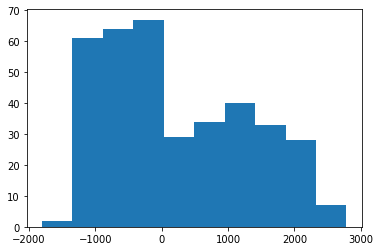

In [ ]:
import matplotlib.pyplot as plt
plt.hist(y_test - predictions)

In [ ]:
len(y_test)

365

In [ ]:
# pred and test

x = test['date']
y1 = y_test
y2 = predictions

p = figure(title="Date vs MW", 
           sizing_mode="stretch_width",
           x_axis_type='datetime',
           x_axis_label='Date',
           y_axis_label='MW')

p.line(x, y1, legend_label="Test", line_width=1)
p.line(x, y2, legend_label="Predicted", line_width=1, color='red')
p.xaxis[0].formatter = DatetimeTickFormatter(months="%b %Y")

output_notebook()
show(p)

## SCORE

In [ ]:
from sklearn.metrics import explained_variance_score
explained_variance_score(y_test, predictions)

0.016140406261259455

In [ ]:
from sklearn.metrics import r2_score 
r2_score(y_test, predictions)

-0.02430405442798511

## Evaluating our Regression Model using Metrics

### 1. Mean Absolute Error

$$\frac 1n\sum_{i=1}^n|y_i-\hat{y}_i|$$


### 2. Mean Squared Error

$$\frac 1n\sum_{i=1}^n(y_i-\hat{y}_i)^2$$


### 3. Root Mean Squared Error

$$\sqrt{\frac 1n\sum_{i=1}^n(y_i-\hat{y}_i)^2}$$


## All these are basically "Loss Functions".
### A loss function is a measure of how good a prediction model does in terms of being able to predict the expected outcome. Basically, we want to reduce the value of Loss functions


In [ ]:
from sklearn import metrics

In [ ]:
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 924.7140793155805
MSE: 1220559.8558891811
RMSE: 1104.7895075032081


# Dataset - 7

In [ ]:
import numpy as np
import pandas as pd
from bokeh.plotting import figure, show
from bokeh.io import output_notebook
from bokeh.models import DatetimeTickFormatter
from bokeh.layouts import row, column

In [ ]:
df = pd.read_excel('/content/7-hour-load-weather-holiday-data.xlsx', parse_dates=True)
df

,DATE,max-temp,min-temp,RH-0830,RH-1730,day,MW
0,2017-01-01 00:00:00,20.3,9.2,100,80,2,1815.571045
1,2017-01-01 01:00:00,20.3,9.2,100,80,2,1576.699585
2,2017-01-01 02:00:00,20.3,9.2,100,80,2,1428.967896
3,2017-01-01 03:00:00,20.3,9.2,100,80,2,1356.272705
4,2017-01-01 04:00:00,20.3,9.2,100,80,2,1354.029175
...,...,...,...,...,...,...,...
26275,2019-12-31 19:00:00,9.4,4.8,91,69,0,4157.812988
26276,2019-12-31 20:00:00,9.4,4.8,91,69,0,4008.450439
26277,2019-12-31 21:00:00,9.4,4.8,91,69,0,3757.650391
26278,2019-12-31 22:00:00,9.4,4.8,91,69,0,3556.840576


## Finding the correlation between the features

In [ ]:
df.corr(method='pearson')

,max-temp,min-temp,RH-0830,RH-1730,day,MW
max-temp,1.000000,0.882116,-0.628697,-0.371664,-0.034996,0.666025
min-temp,0.882116,1.000000,-0.464201,-0.127366,-0.050936,0.768115
RH-0830,-0.628697,-0.464201,1.000000,0.538387,-0.005248,-0.338540
RH-1730,-0.371664,-0.127366,0.538387,1.000000,-0.029325,-0.054682
day,-0.034996,-0.050936,-0.005248,-0.029325,1.000000,-0.127804
MW,0.666025,0.768115,-0.338540,-0.054682,-0.127804,1.000000


In [ ]:
x = df[['max-temp',	'min-temp',	'RH-0830',	'RH-1730', 'day']]
y = df['MW']

## Split Data into Training and Testing

In [ ]:
# MANUAL SPLIT

train = df.loc[ df['DATE'].dt.year < 2019 ]
test = df.loc[ df['DATE'].dt.year >= 2019 ]

x_train = train[['max-temp',	'min-temp',	'RH-0830',	'RH-1730', 'day']]
y_train = train['MW']

x_test = test[['max-temp',	'min-temp',	'RH-0830',	'RH-1730', 'day']]
y_test = test['MW']

In [ ]:
# train_test_split => GIVING BETTER RESULTS

# from sklearn.model_selection import train_test_split
# x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3)


## Creating the model using Random Forest Regressor

In [ ]:
#Importing Random Forest Regressor from ensemble library
from sklearn.ensemble import RandomForestRegressor

In [ ]:
#Initialize the model
model = RandomForestRegressor()

In [ ]:
#Fitting our train data on the model
model.fit(x_train, y_train)

RandomForestRegressor()

In [ ]:
r2_score = model.score(x_test,y_test)
print(r2_score*100,'%')

68.27281479194554 %


## Now we move on the the Prediction Analysis!

In [ ]:
predictions = model.predict(x_test)

In [ ]:
predictions

array([2677.56724923, 2677.56724923, 2677.56724923, ..., 2843.80853682,
       2843.80853682, 2843.80853682])

(array([  14.,  487.,  915., 1279., 1617., 2305., 1406.,  596.,  129.,
          12.]),
 array([-1796.73860107, -1386.35604387,  -975.97348666,  -565.59092945,
         -155.20837225,   255.17418496,   665.55674217,  1075.93929938,
         1486.32185658,  1896.70441379,  2307.086971  ]),
 <a list of 10 Patch objects>)

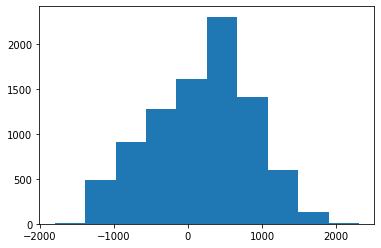

In [ ]:
import matplotlib.pyplot as plt
plt.hist(y_test - predictions)

In [ ]:
len(y_test)

8760

In [ ]:
# pred and test

x = test['DATE']
y1 = y_test
y2 = predictions

p = figure(title="Date vs MW", 
           sizing_mode="stretch_width",
           x_axis_type='datetime',
           x_axis_label='Date',
           y_axis_label='MW')

p.line(x, y1, legend_label="Test", line_width=1)
p.line(x, y2, legend_label="Predicted", line_width=1, color='red')
p.xaxis[0].formatter = DatetimeTickFormatter(months="%b %Y")

output_notebook()
show(p)

## SCORE

In [ ]:
from sklearn.metrics import explained_variance_score
explained_variance_score(y_test, predictions)

0.7048747846399375

In [ ]:
from sklearn.metrics import r2_score 
r2_score(y_test, predictions)

0.6827281479194554

## Evaluating our Regression Model using Metrics

### 1. Mean Absolute Error

$$\frac 1n\sum_{i=1}^n|y_i-\hat{y}_i|$$


### 2. Mean Squared Error

$$\frac 1n\sum_{i=1}^n(y_i-\hat{y}_i)^2$$


### 3. Root Mean Squared Error

$$\sqrt{\frac 1n\sum_{i=1}^n(y_i-\hat{y}_i)^2}$$


## All these are basically "Loss Functions".
### A loss function is a measure of how good a prediction model does in terms of being able to predict the expected outcome. Basically, we want to reduce the value of Loss functions


In [ ]:
from sklearn import metrics

In [ ]:
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 585.0636372804923
MSE: 486833.34112072486
RMSE: 697.7344345241424


# Dataset - 8

In [ ]:
import numpy as np
import pandas as pd
from bokeh.plotting import figure, show
from bokeh.io import output_notebook
from bokeh.models import DatetimeTickFormatter
from bokeh.layouts import row, column

In [ ]:
df = pd.read_excel('/content/8-day-load-weather-holiday-data.xlsx', parse_dates=True)
df

,date,max-temp,min-temp,RH-0830,RH-1730,MW,day
0,2017-01-01,20.3,9.2,100,80,3536.238770,2
1,2017-01-02,23.2,9.3,100,82,3639.738770,0
2,2017-01-03,24.3,9.5,100,77,3673.321289,0
3,2017-01-04,24.0,8.9,97,66,3898.860840,0
4,2017-01-05,25.2,10.4,97,71,3547.965820,2
...,...,...,...,...,...,...,...
1090,2019-12-27,13.4,4.2,86,76,4976.180664,0
1091,2019-12-28,14.4,2.4,100,83,4708.879395,1
1092,2019-12-29,13.3,3.1,94,79,4831.750488,1
1093,2019-12-30,15.8,2.6,100,97,5298.331055,0


## Finding the correlation between the features

In [ ]:
df.corr(method='pearson')

,max-temp,min-temp,RH-0830,RH-1730,MW,day
max-temp,1.000000,0.882116,-0.628697,-0.371664,0.643710,-0.034996
min-temp,0.882116,1.000000,-0.464201,-0.127366,0.776070,-0.050936
RH-0830,-0.628697,-0.464201,1.000000,0.538387,-0.327478,-0.005248
RH-1730,-0.371664,-0.127366,0.538387,1.000000,-0.016560,-0.029325
MW,0.643710,0.776070,-0.327478,-0.016560,1.000000,-0.150346
day,-0.034996,-0.050936,-0.005248,-0.029325,-0.150346,1.000000


In [ ]:
x = df[['max-temp',	'min-temp',	'RH-0830',	'RH-1730', 'day']]
y = df['MW']

## Split Data into Training and Testing

In [ ]:
# MANUAL SPLIT

train = df.loc[ df['date'].dt.year < 2019 ]
test = df.loc[ df['date'].dt.year >= 2019 ]

x_train = train[['max-temp',	'min-temp',	'RH-0830',	'RH-1730', 'day']]
y_train = train['MW']

x_test = test[['max-temp',	'min-temp',	'RH-0830',	'RH-1730', 'day']]
y_test = test['MW']

In [ ]:
# train_test_split => GIVING BETTER RESULTS

# from sklearn.model_selection import train_test_split
# x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3)


## Creating the model using Random Forest Regressor

In [ ]:
#Importing Random Forest Regressor from ensemble library
from sklearn.ensemble import RandomForestRegressor

In [ ]:
#Initialize the model
model = RandomForestRegressor()

In [ ]:
#Fitting our train data on the model
model.fit(x_train, y_train)

RandomForestRegressor()

In [ ]:
r2_score = model.score(x_test,y_test)
print(r2_score*100,'%')

84.22768614650516 %


## Now we move on the the Prediction Analysis!

In [ ]:
predictions = model.predict(x_test)

In [ ]:
predictions

array([3980.51743652, 4030.04096191, 3915.04547852, 4061.27564941,
       3952.77304688, 3773.41886475, 4031.06262207, 3966.59746582,
       3888.16471924, 3999.20691162, 4011.51814941, 3836.90686035,
       3835.11281006, 3779.60482178, 3991.63654785, 3975.84873291,
       4007.66171875, 3974.46824707, 4126.53189453, 3830.38839355,
       3531.62499756, 3675.33867676, 3960.00989258, 3796.24584473,
       3763.02955811, 3993.54233887, 3969.82765137, 4003.03671387,
       4160.18247314, 3994.10304199, 3996.71794189, 3695.4699707 ,
       3850.7624585 , 3836.62304443, 3931.60984131, 3751.81856201,
       3719.07593506, 3620.03606689, 4082.04490234, 3897.30835693,
       3982.71823242, 4087.221521  , 3726.09939453, 3750.9193335 ,
       3662.06021484, 3680.97830811, 3649.19323486, 3768.88726318,
       3740.08860352, 3380.87934082, 3624.50118652, 3780.72909424,
       3539.74396973, 3709.74456787, 3727.66690186, 3843.50703613,
       3763.11544189, 3822.11649414, 4141.81625488, 4023.32658

(array([  2.,   1.,   5.,  30., 101., 102.,  76.,  39.,   7.,   2.]),
 array([-1281.34644043, -1004.1144707 ,  -726.88250098,  -449.65053125,
         -172.41856152,   104.8134082 ,   382.04537793,   659.27734766,
          936.50931738,  1213.74128711,  1490.97325684]),
 <a list of 10 Patch objects>)

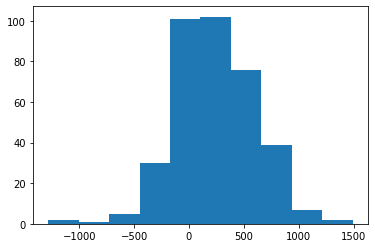

In [ ]:
import matplotlib.pyplot as plt
plt.hist(y_test - predictions)

In [ ]:
len(y_test)

365

In [ ]:
# pred and test

x = test['date']
y1 = y_test
y2 = predictions

p = figure(title="Date vs MW", 
           sizing_mode="stretch_width",
           x_axis_type='datetime',
           x_axis_label='Date',
           y_axis_label='MW')

p.line(x, y1, legend_label="Test", line_width=1)
p.line(x, y2, legend_label="Predicted", line_width=1, color='red')
p.xaxis[0].formatter = DatetimeTickFormatter(months="%b %Y")

output_notebook()
show(p)

## SCORE

In [ ]:
from sklearn.metrics import explained_variance_score
explained_variance_score(y_test, predictions)

0.8890551739529472

In [ ]:
from sklearn.metrics import r2_score 
r2_score(y_test, predictions)

0.8422768614650517

## Evaluating our Regression Model using Metrics

### 1. Mean Absolute Error

$$\frac 1n\sum_{i=1}^n|y_i-\hat{y}_i|$$


### 2. Mean Squared Error

$$\frac 1n\sum_{i=1}^n(y_i-\hat{y}_i)^2$$


### 3. Root Mean Squared Error

$$\sqrt{\frac 1n\sum_{i=1}^n(y_i-\hat{y}_i)^2}$$


## All these are basically "Loss Functions".
### A loss function is a measure of how good a prediction model does in terms of being able to predict the expected outcome. Basically, we want to reduce the value of Loss functions


In [ ]:
from sklearn import metrics

In [ ]:
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 336.54086308727517
MSE: 187942.76016813386
RMSE: 433.5236558345275
